# EDA+FE

1. Desarrollo de datasets
2. **Analisis exploratorio**
3. **Ingenieria de caracteristicas**
4. Enternamiento y prueba de modelo

Realizo el analisis exploratorio de los datatasets armados

In [151]:
# Importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Ajuste de funcion poly
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [152]:
# Cargo los dataset a utilizar
dataset_general = pd.read_csv('data/transform/dataset_ventas.csv')

# Cargo los dataset a utilizar
dataset_precio_prom = pd.read_csv('data/transform/dataset_precio_prom.csv')

In [153]:
dataset_general.shape

(230, 10)

In [154]:
dataset_general.columns

Index(['Unnamed: 0', 'año_mes', 'actos_coleg_esc', 'monto_cred_uva', 'superficie', 'precio_prom_x', 'expectativa_inflacion_mediana', 'tasas_interes_pm', 'tipo_cambio_implicito_en_adrs', 'precio_prom_y'], dtype='object')

In [155]:
dataset_general.head(500)

,Unnamed: 0,año_mes,actos_coleg_esc,monto_cred_uva,superficie,precio_prom_x,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_prom_y
0,0,2002-01,1678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-02,1557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002-03,3434.0,NaN,NaN,NaN,NaN,NaN,2.637099,NaN
3,3,2002-04,8035.0,NaN,NaN,NaN,NaN,NaN,2.996129,NaN
4,4,2002-05,8098.0,NaN,NaN,NaN,NaN,NaN,3.207032,NaN
5,5,2002-06,3548.0,NaN,NaN,NaN,NaN,NaN,3.805914,NaN
6,6,2002-07,4308.0,NaN,NaN,NaN,NaN,NaN,3.659872,NaN
7,7,2002-08,4380.0,NaN,NaN,NaN,NaN,NaN,3.729838,NaN
8,8,2002-09,4580.0,NaN,NaN,NaN,NaN,NaN,3.822573,NaN
9,9,2002-10,5048.0,NaN,NaN,NaN,NaN,NaN,3.781978,NaN


In [156]:
# Columna no me aporta valor
dataset_general = dataset_general.drop('Unnamed: 0', 1)

In [157]:
# Notamos que no hay casi datos para momentos previos al 2010-01 y posteriores al 2019-08 con lo cual marco
# los limites de analisis en esos casi 10 años.
dataset_general = dataset_general.iloc[96:211].copy()

dataset_general.insert(0, 'Index', range(0, len(dataset_general)))

# Seteo index
dataset_general = dataset_general.set_index("año_mes")

In [158]:
dataset_general = dataset_general.rename(columns={"precio_prom_x":"precio_venta_m2",
                                                  "precio_prom_y":"precio_alquiler",
                                                 })

In [159]:
dataset_general["precio_alquiler_dolares"] = dataset_general["precio_alquiler"] / dataset_general["tipo_cambio_implicito_en_adrs"]

In [160]:
dataset_general

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
año_mes,,,,,,,,,,
2010-01,0,3433.0,NaN,NaN,NaN,20.0,NaN,3.835480,NaN,NaN
2010-02,1,3331.0,NaN,NaN,1606.519481,25.0,NaN,3.864431,NaN,NaN
2010-03,2,4958.0,NaN,NaN,NaN,25.0,NaN,3.899503,NaN,NaN
2010-04,3,4813.0,NaN,NaN,NaN,30.0,NaN,3.886761,NaN,NaN
2010-05,4,5168.0,NaN,NaN,1639.171429,25.0,NaN,3.913501,NaN,NaN
2010-06,5,5615.0,NaN,NaN,NaN,25.0,NaN,4.004523,NaN,NaN
2010-07,6,5537.0,NaN,NaN,NaN,25.0,NaN,3.961692,NaN,NaN
2010-08,7,5477.0,NaN,NaN,1555.592233,25.0,NaN,3.950982,NaN,NaN
2010-09,8,5657.0,NaN,NaN,NaN,25.0,NaN,3.953970,NaN,NaN


In [161]:
dataset_general.describe()

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
count,115.000000,113.000000,3.900000e+01,73.000000,38.000000,115.000000,44.000000,115.000000,73.000000,73.000000
mean,57.000000,4042.415929,4.003012e+06,75948.095890,2236.425734,27.426087,38.316238,13.651881,8642.663379,470.381430
std,33.341666,1333.616925,3.951093e+06,22078.669813,386.762260,4.296185,15.364166,10.355011,4404.692550,97.657579
min,0.000000,1629.000000,2.075000e+03,46578.000000,1555.592233,20.000000,24.750000,3.835480,3116.114286,319.029819
25%,28.500000,3121.000000,9.815580e+05,60630.000000,2094.055442,25.000000,26.504032,6.112894,4629.642857,395.825643
50%,57.000000,3689.000000,2.627608e+06,67366.000000,2201.400075,30.000000,30.461012,11.882481,7569.619048,429.469091
75%,85.500000,5020.000000,5.820660e+06,85289.000000,2428.770034,30.000000,44.954685,15.650771,12377.666667,533.867853
max,114.000000,7861.000000,1.393723e+07,138079.000000,2903.775701,40.000000,71.924129,45.010039,17957.863636,687.438634


<ipython-input-162-7830b902f25b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


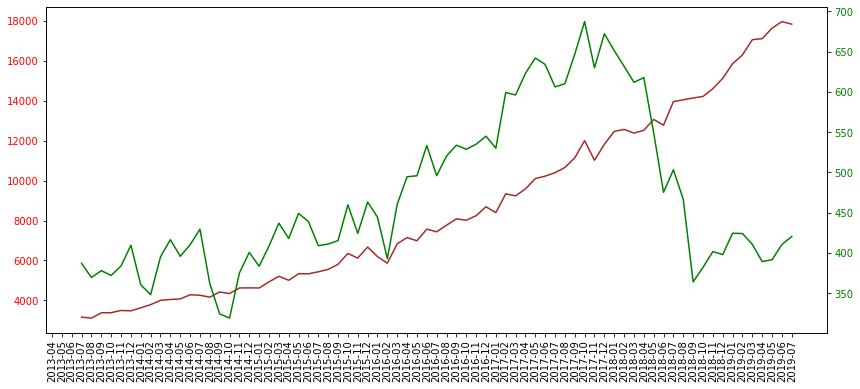

In [162]:
# Analisis de variacion de precio de alquiler en el tiempo:

from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["precio_alquiler"], color='brown')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["precio_alquiler_dolares"], color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [163]:
# En este primer grafico podemos ver que a pesar de aumentar el valor nominal de los precios (de manera progresiva e
# ininterrumpida), desde el 2017-10 en su pico maximo el valor de los alquileres en dolares cae de manera
# abrupta a valores del año 2014.

In [164]:
# Esto pareceria estar relacionado con un aumento del dolar que no pudo ser trasladado al precio del alquiler.

<ipython-input-165-852c761b1cad>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115].index, rotation = 90)


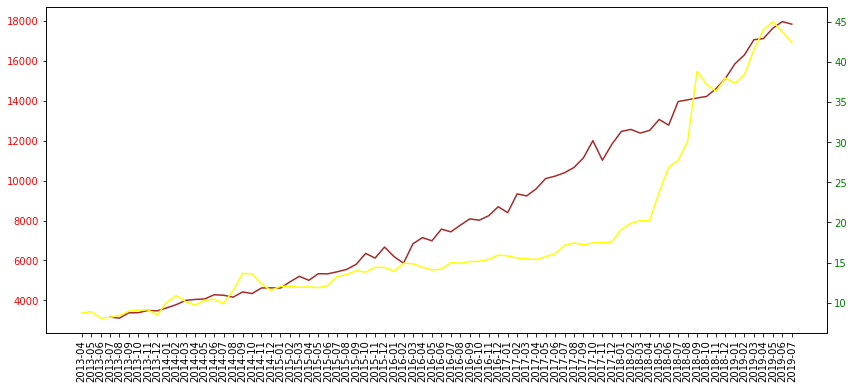

In [165]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["precio_alquiler"].iloc[39:115], color='brown')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()


# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115], color='yellow')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115].index, rotation = 90)

plt.show()

In [166]:
# Podemos validar la premisa anterior. La aceleracion del valor del dolar es mucho mayor. De hecho, podemos ver que se 
# incrementa de manera mas abrupta pasados algunos meses de la subida. Existe un pequeño retardo en el mercado.

In [167]:
# Vamos a visualizar ahora la relacion que existe entre los montos en cred UVA y la cantidad de compra-ventas que hubo. Para
# evaluar el impacto de la politica

<ipython-input-168-6f3fbbd06dba>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


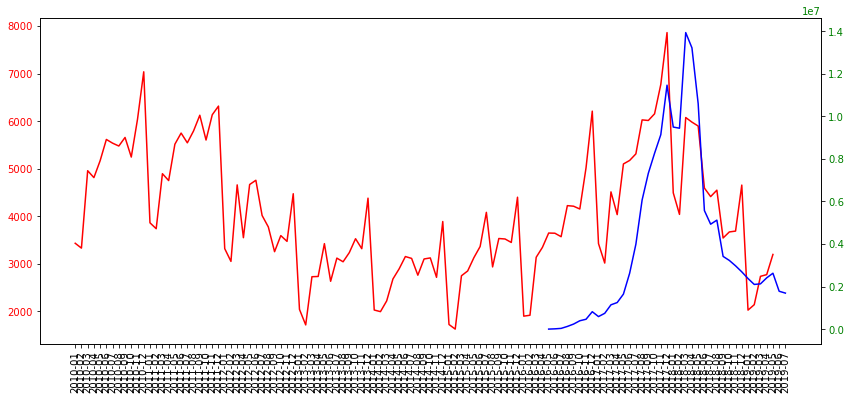

In [168]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["monto_cred_uva"], color='blue')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [169]:
# En primer lugar podemos notar una marcada estacionalidad en la ventas de inmuebles. En los meses de enero y feberero
# habitualmente la cantidad de ventas es inferior. 
# Lo segundo que podemos visualizar es el repunte que existio con el beneficio del credito UVA. Aumento significativamente,
# pero ¿Cuanto? Vamos a intentar estimarlo:

In [170]:
# Vamos a dividir el dataset en dos partes y evaluar el rango de ventas de inmuebles para momentos previos y posteriores
# a la medida:

In [173]:
dataset_general["uva"] = 0
dataset_general.loc[(dataset_general["monto_cred_uva"].isnull() ), "uva"] = "NO"
dataset_general.loc[(dataset_general["uva"] == 0 ), "uva"] = "SI"

<AxesSubplot:xlabel='uva', ylabel='actos_coleg_esc'>

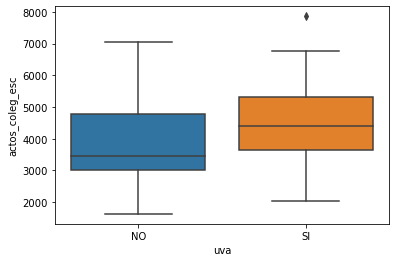

In [175]:
sns.boxplot(x="uva", y="actos_coleg_esc", data=dataset_general)

In [177]:
dataset_general.groupby("uva")["actos_coleg_esc"].mean()

uva
NO    3818.776316
SI    4501.783784
Name: actos_coleg_esc, dtype: float64

In [ ]:
# En el boxplot podemos visualizar el aumento producido por la politica podemos ver que no es tan significativo como parecia.
# Osea, si bien la politica genero un repunte importante, la realidad es que son valores similares a los valores compra venta
# anteriores al 2013.

In [124]:
# Ahora vamos a analizar si existe relacion entre la superficie en alquiler y el precio de los alquileres

<ipython-input-125-518031310984>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


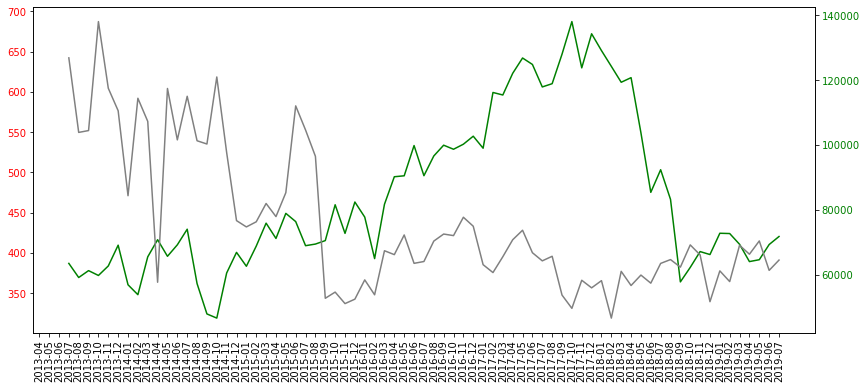

In [125]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["precio_alquiler_dolares"], color='green')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["superficie"], color='gray')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [126]:
# Aqui podemos ver dos etapas. La primera, previa a la devaluacion de 2018, tenemos una relacion inversa. A menor
# cantidad de metros mayores disponibles, precios mas altos. Sin embargo, esta relacion sufre una ruptura durante el proceso
# devaluatorio citado.

In [127]:
# Para estimar los valores intermedios del precio_venta_m2 voy a usar una funcion polynomica ajustada

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [128]:
# Genero el dataset de entrenamiento filtrando nulos en la columna precio_venta_m2
dataset_train = dataset_general[(dataset_general["precio_venta_m2"].notnull())]

x = dataset_train["Index"]
y = dataset_train['precio_venta_m2']

# Realizo el fit
xfit = dataset_train["Index"]
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

<ipython-input-128-3c2b00ae9650>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)
<ipython-input-128-3c2b00ae9650>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  yfit = poly_model.predict(xfit[:, np.newaxis])


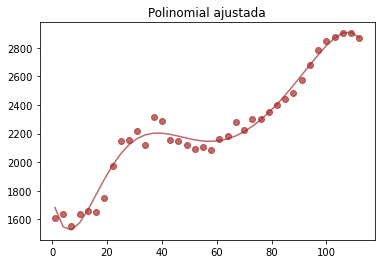

In [129]:
# Graficamos resultante.
plt.title('Polinomial ajustada')
plt.scatter(x, y, color='brown', alpha=0.7)
plt.plot(xfit, yfit, color='brown', alpha=0.7);

In [130]:
# Defino la funcion utilizada para las predicciones
def poly_predict(x):
  """
    Precio de venta en dolares por mes
    @PARAM x = numero de mes
  """
  return poly_model.predict([[x]])[0]

In [131]:
# Realizo las predicciones sobre el dataset faltante para completarlo

In [132]:
# Reemplazo los nulos por 0
dataset_general['precio_venta_m2'] = dataset_general['precio_venta_m2'].replace(np.nan, 0)

In [133]:
# Reemplazo los 0 por las valores predict
for row in dataset_general.iterrows():
    index = row[1]["Index"]
    precio_venta_m2 = row[1]["precio_venta_m2"]
    if precio_venta_m2 == 0:
        precio_venta_m2_predict = poly_predict(index)
        dataset_general.loc[(dataset_general["Index"] == index ),"precio_venta_m2"] = precio_venta_m2_predict

In [134]:
dataset_general.head(3)

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
año_mes,,,,,,,,,,
2010-01,0,3433.0,NaN,NaN,1761.056489,20.0,NaN,3.835480,NaN,NaN
2010-02,1,3331.0,NaN,NaN,1606.519481,25.0,NaN,3.864431,NaN,NaN
2010-03,2,4958.0,NaN,NaN,1621.513188,25.0,NaN,3.899503,NaN,NaN


In [135]:
# Ahora puedo seguir realizando el analisis en funcion del precio de venta

In [136]:
# Vamos a validar si existe relacion entre el precio promedio del m2 en dolares y la cantidad de ventas

<ipython-input-137-b3caf6e1638e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


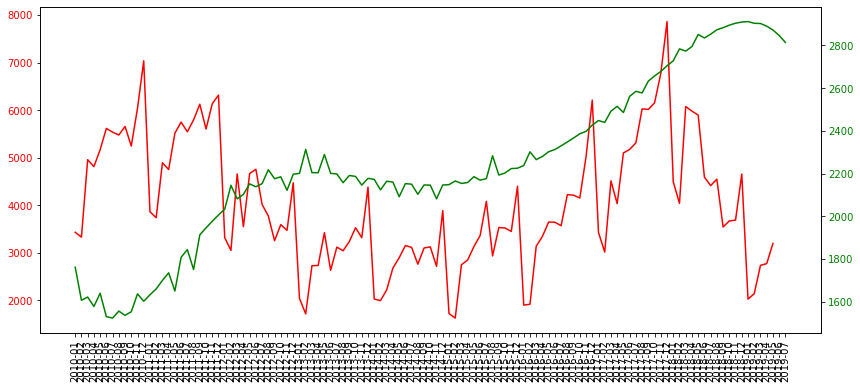

In [137]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["precio_venta_m2"], color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [138]:
# Si bien parece haber cierta relacion, particularmente del 2012 en adelante, diria que no es concluyente la misma. Ya que
# podemos ver para valores anteriores todo lo contrario. El dataset no es lo suficientemente amplio como para afirmar
# dicha conclucion.

In [139]:
# Vamos a validar si existe relacion entre la cantidad de ventas y la expectativa de inflacion/interes

<ipython-input-140-5584e060957d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


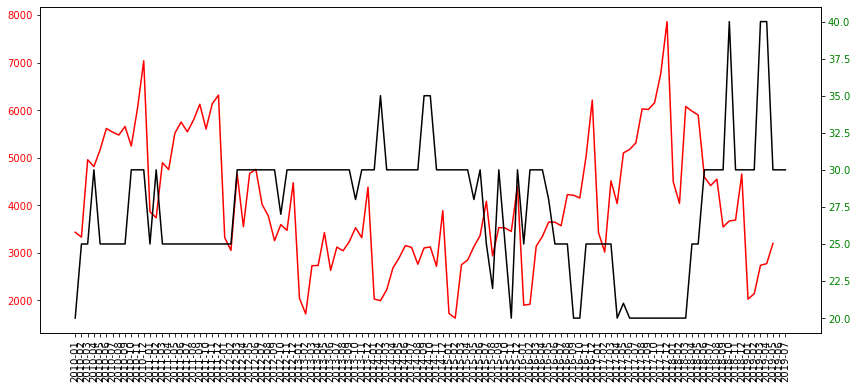

In [140]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["expectativa_inflacion_mediana"], color='black')
ax2.tick_params(axis='y', labelcolor='green')


ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [141]:
# Aqui podemos ver como la relacion es marcadamente inversa. Ocurren mayor cantidad de compra/venta en periodos de baja 
# inflacion y viceversa. 

<ipython-input-142-caa01629c5b4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


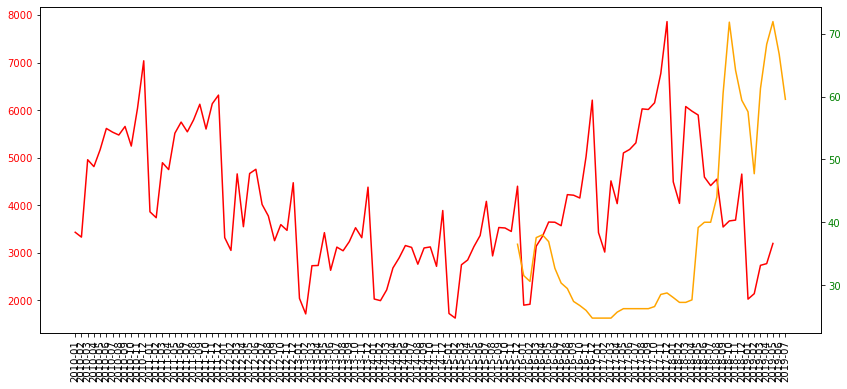

In [142]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(14,6))

# El precio en $ del alquiler lo pongo en rojo
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler lo pongo en verde
ax2.plot(dataset_general["tasas_interes_pm"], color='orange')
ax2.tick_params(axis='y', labelcolor='green')


ax.set_xticklabels(dataset_general.index, rotation = 90)

plt.show()

In [143]:
# Al igual que con la inflacion parece haber una relacion inversa. Cabe destacar igual que la tasa de interes a diferencia
# de la inflacion puede ser controlada con mayor facilidad por el estado. Con lo cual es una regla blanda.
# Tambien podemos deducir como durante la gestion macrista la tasa de interes quizo vencer a la expectativa de inflacion, 
# generando una correlacion entre ellas.

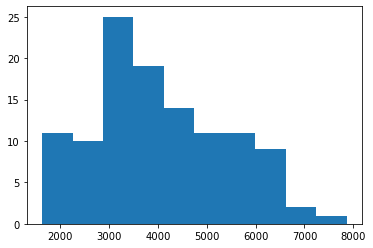

In [144]:
# Realizo un histograma del target para ver como se distribuye
plt.hist(dataset_general["actos_coleg_esc"], bins = 10)
plt.show()

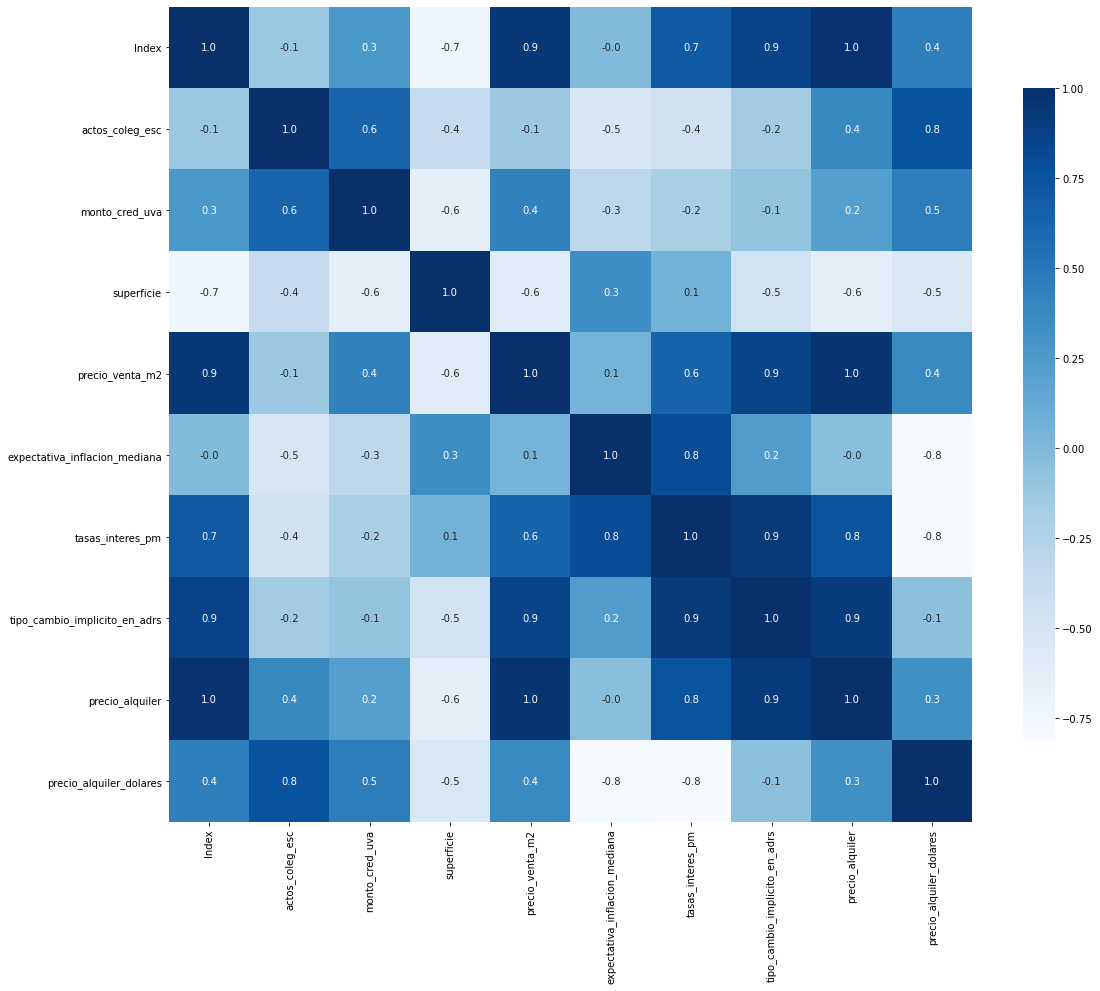

In [145]:
# Verifico si existe correlaciones lineales:
dataset_general = dataset_general.corr()

# Verifico correlaciones lineales
# Verifico las correlaciones entre variables
fig, ax = plt.subplots(figsize=(18,15))

# plot heatmap
sns.heatmap(dataset_general, annot=True, fmt=".1f", cmap='Blues', cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Notamos que existen buenas correlaciones lineales entre algunos de las features:
# Entre montos_cred_uva y actos_coleg_esc, tasa de interes y expectativa de inflacion, entre otros.
# Tambien, entre tasa_interes_pm y actos_coleg_esc tenemos una correlacion lineal negativa muy alta 

Realizo la ing de caracteristicas faltante.

In [451]:
# Tomo el rango donde poseemos valores en todas las columnas, columnas de las cuales ya demostramos su interes.
dataset_general_fe = dataset_general[42:112].copy()

In [452]:
dataset_general_fe

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
año_mes,,,,,,,,,,
2013-07,42,3121.0,NaN,126882.0,2197.955607,30.0,NaN,8.176365,3164.230769,386.997250
2013-08,43,3044.0,NaN,103881.0,2156.769231,30.0,NaN,8.434407,3116.114286,369.452667
2013-09,44,3237.0,NaN,104452.0,2190.681192,30.0,NaN,8.943943,3380.944444,378.014975
2013-10,45,3529.0,NaN,138079.0,2186.428252,28.0,NaN,9.102674,3386.259259,372.007083
2013-11,46,3319.0,NaN,117513.0,2145.580000,30.0,NaN,9.115745,3498.634146,383.801251
2013-12,47,4381.0,NaN,110570.0,2177.299465,30.0,NaN,8.492329,3478.825000,409.643206
2014-01,48,2030.0,NaN,84348.0,2172.652598,30.0,NaN,10.070013,3629.588235,360.435305
2014-02,49,1996.0,NaN,114418.0,2123.312500,35.0,NaN,10.886643,3789.700000,348.105476
2014-03,50,2222.0,NaN,107282.0,2163.724539,30.0,NaN,10.134182,4004.550000,395.152745


In [453]:
# Reemplazo los nulos de monto cred uva por 0, ya que en ese momento no existia dicha politica
dataset_general_fe["monto_cred_uva"].fillna( 0 , inplace = True)

In [454]:
# Completo las tasas de interes faltantes con datos de otra bibliografia:
# https://repositorio.cepal.org/bitstream/handle/11362/36970/32/Argentina_es.pdf
# La tasa de interes en el 2013 era de 17.14%.
# La tasa de interes en el 2014 era de 24%.
# La tasa de interes en el 2015 era de 24.9%.

In [455]:
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2013" ), "tasas_interes_pm"] = 17.14
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2014" ), "tasas_interes_pm"] = 24
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2015" ), "tasas_interes_pm"] = 24.9

In [457]:
# Voy a dropear la variacion del dolar y el vapor prom en pesos del alquiler. Solo me voy a quedar con valores dolarizados
dataset_general_fe = dataset_general_fe.drop('tipo_cambio_implicito_en_adrs', 1)
dataset_general_fe = dataset_general_fe.drop('precio_alquiler', 1)

In [462]:
# Para marcarle la estacionalidad al algoritmo vamos a agregar un input mes. Este va estar compuesto por un int
# que tomara un valor absoluto relacionado con la cantidad de ventas en ese mes habitualmente contra los otros.
dataset_general_fe["mes"] = dataset_general_fe.index.str[5:7]

In [467]:
dataset_general_fe.groupby("mes")["actos_coleg_esc"].mean().to_frame().sort_values(by='actos_coleg_esc', ascending=False)

,actos_coleg_esc
mes,
12,5233.166667
11,4161.000000
05,4134.400000
10,4025.833333
06,3986.000000
09,3940.500000
07,3936.000000
08,3923.500000
04,3611.333333


In [473]:
mapping_mes_weight={
    "12":12,
    "11":11,
    "05":10,
    "10":9,
    "06":8,
    "09":7,
    "07":6,
    "08":5,
    "04":4,
    "03":3,
    "01":2,
    "02":1
}

In [475]:
dataset_general_fe['mes'] = dataset_general_fe['mes'].map(mapping_mes_weight)

In [477]:
dataset_general_fe = dataset_general_fe.drop('Index', 1)

In [480]:
dataset_general_fe = dataset_general_fe.reset_index()
dataset_general_fe = dataset_general_fe.drop('año_mes', 1)

In [482]:
dataset_general_fe.to_csv("data/fe/dataset_fe.csv")